# Reducing hospital readmissions

## 📖 Background
You work for a consulting company helping a hospital group better understand patient readmissions. The hospital gave you access to ten years of information on patients readmitted to the hospital after being discharged. The doctors want you to assess if initial diagnoses, number of procedures, or other variables could help them better understand the probability of readmission. 

They want to focus follow-up calls and attention on those patients with a higher probability of readmission.

## 💾 The data
You have access to ten years of patient information ([source](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008)):

#### Information in the file
- "age" - age bracket of the patient
- "time_in_hospital" - days (from 1 to 14)
- "n_procedures" - number of procedures performed during the hospital stay
- "n_lab_procedures" - number of laboratory procedures performed during the hospital stay
- "n_medications" - number of medications administered during the hospital stay
- "n_outpatient" - number of outpatient visits in the year before a hospital stay
- "n_inpatient" - number of inpatient visits in the year before the hospital stay
- "n_emergency" - number of visits to the emergency room in the year before the hospital stay
- "medical_specialty" - the specialty of the admitting physician
- "diag_1" - primary diagnosis (Circulatory, Respiratory, Digestive, etc.)
- "diag_2" - secondary diagnosis
- "diag_3" - additional secondary diagnosis
- "glucose_test" - whether the glucose serum came out as high (> 200), normal, or not performed
- "A1Ctest" - whether the A1C level of the patient came out as high (> 7%), normal, or not performed
- "change" - whether there was a change in the diabetes medication ('yes' or 'no')
- "diabetes_med" - whether a diabetes medication was prescribed ('yes' or 'no')
- "readmitted" - if the patient was readmitted at the hospital ('yes' or 'no') 

***Acknowledgments**: Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, and John N. Clore, "Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records," BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014.*

In [1]:
import pandas as pd
df = pd.read_csv('data/hospital_readmissions.csv')
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


## 💪 Competition challenge
Create a report that covers the following:

1. What is the most common primary diagnosis by age group? 
2. Some doctors believe diabetes might play a central role in readmission. Explore the effect of a diabetes diagnosis on readmission rates. 
3. On what groups of patients should the hospital focus their follow-up efforts to better monitor patients with a high probability of readmission?

## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 35%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in-depth enough but also concise.</li></ul> |
| **Visualizations** | 20% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul> |
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights. 
- Try to include an **executive summary** of your recommendations at the beginning.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

To analyse the data we need first to import all the necessary Python packages.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("colorblind")
custom_palette = sns.color_palette("Paired", 6)
custom_palette_1 = sns.color_palette("bright")

Then, we import the data stored in 'data/hospital_readmissions.csv' file with pandas .read_csv() and use .head() to view the first 5 rows of df DataFrame.

In [3]:
df = pd.read_csv('data/hospital_readmissions.csv')
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


The first question of the challenge is:	

             What is the most common primary diagnosis by age group?

To answer the question, we have created a subset of df DataFrame, called primary_diagnosis_age, where we grouped the data by age. We counted the data, using value_counts(). We have sorted the data in ascending order.

In [4]:
primary_diagnosis_age = df.groupby("age", as_index=False)["diag_1"].value_counts(ascending = True) 

Then, we rename the diag_1 column in the primary_diagnosis_age dataset to make the dataset reading easier.

In [5]:
primary_diagnosis_age.rename(columns={"diag_1":"primary_diagnosis"}, inplace=True)
print(primary_diagnosis_age.head())

       age primary_diagnosis  count
0  [40-50)   Musculoskeletal    100
1  [40-50)            Injury    162
2  [40-50)         Digestive    271
3  [40-50)          Diabetes    369
4  [40-50)       Respiratory    376


Now, we can plot the data of primary_diagnosis_age dataset with seaborn as a barplot(), where x-axis represents the values count, y-axis represents primary diagnosis and hue was used to show the age-distribution.

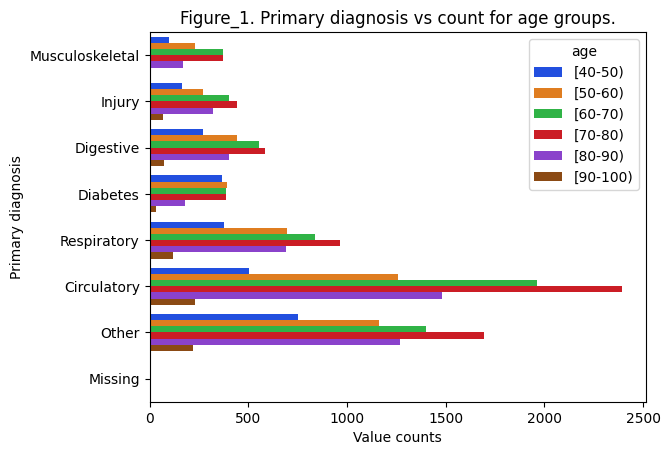

In [6]:
sns.barplot(x='count', y='primary_diagnosis', hue='age', palette= custom_palette_1, data=primary_diagnosis_age).set(title = 'Figure_1. Primary diagnosis vs count for age groups.')
plt.xlabel('Value counts')
plt.ylabel('Primary diagnosis')
plt.show()

Figure_1 shows that Circulatory primary diagnosis is the most common diagnosis for the majority of age groups.

Since, number of observation is different withing  age groups, we added a new column to the primary_diagnosis_age dataset, which represents the percentage of each diagnosis to the total count of observation within an age group.

In [7]:
primary_diagnosis_age['percentage_to_total_count'] = primary_diagnosis_age.groupby('age', group_keys=False ).apply(lambda x: x['count'] / x['count'].sum() * 100).sort_index()
print(primary_diagnosis_age.head())

       age primary_diagnosis  count  percentage_to_total_count
0  [40-50)   Musculoskeletal    100                   3.949447
1  [40-50)            Injury    162                   6.398104
2  [40-50)         Digestive    271                  10.703002
3  [40-50)          Diabetes    369                  14.573460
4  [40-50)       Respiratory    376                  14.849921


Then, we replotted the data of primary_diagnosis_age dataset with seaborn as a barplot() with percentage_to_total_count column along x-axis.

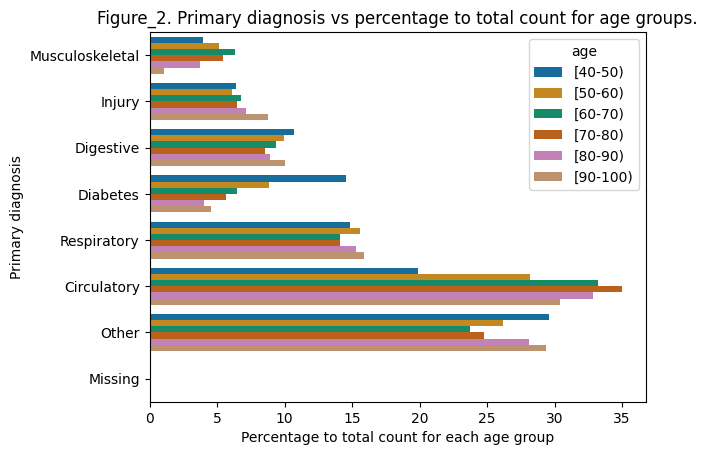

In [8]:
sns.barplot(x='percentage_to_total_count', y='primary_diagnosis', hue='age', 
data=primary_diagnosis_age).set(title = 'Figure_2. Primary diagnosis vs percentage to total count for age groups.')
plt.xlabel('Percentage to total count for each age group')
plt.ylabel('Primary diagnosis')
plt.show()

The data, shown in Figure_2, confirmed the results of our previous observation that Circulatory primary diagnosis is the most common diagnosis for the majority of age groups. 

However, as it is shown in Figure_2, for people in the 40-50 age group the diagnosis named as Other is the dominant one. To further investigate the observation, we created a dataset primary_diagnosis_circulatory_other, where we have selected the data related to Circulatory and Other diagnosis only. Then, we plotted a seaborn barplot() with age along x-axis, percentage_to_total_count as y-axis and hue for the diagnosis (Circulatory and Other).

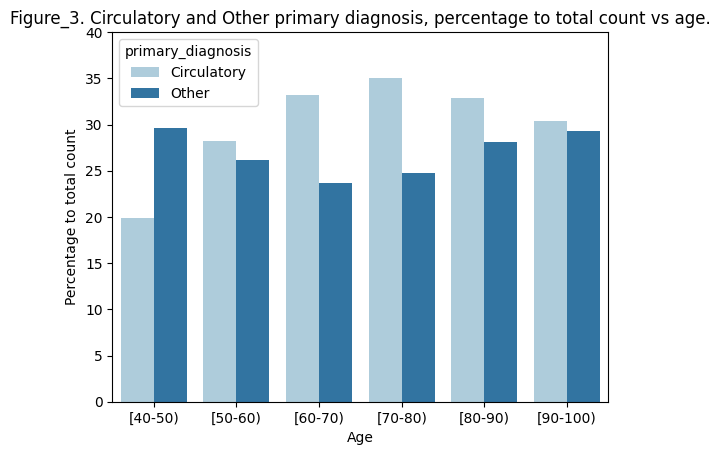

In [9]:
primary_diagnosis_circulatory_other = primary_diagnosis_age[(primary_diagnosis_age["primary_diagnosis"]=="Circulatory") | (primary_diagnosis_age["primary_diagnosis"]=="Other")]

sns.barplot(x='age', y='percentage_to_total_count', hue = 'primary_diagnosis', palette= custom_palette, data=primary_diagnosis_circulatory_other).set(title = 'Figure_3. Circulatory and Other primary diagnosis, percentage to total count vs age.')
plt.xlabel('Age')
plt.ylabel('Percentage to total count')
plt.ylim(0,40)
plt.show()

As it is clearly seen in Figure_3, Circulatory is the prevailing diagnosis for all age groups except 40-50 age group, where Other diagnosis is more common than Circulatory.

The second question of the challenge is:

	Some doctors believe diabetes might play a central role in readmission. Explore the effect of a diabetes diagnosis on readmission rates.

To answer the question, we have created a subset of df DataFrame, called diabetes_readmission, where we selected the data of df DataFrame, where the primary, secondary or additional secondary diagnosis was Diabetes and the patient was readmitted. We counted the data, using value_counts(). For easy reading, we sorted the data in ascending order.

In [10]:
diabetes_readmission = df[((df["diag_1"] =='Diabetes') & (df["readmitted"] == 'yes')) | ((df["diag_2"] =='Diabetes') & (df["readmitted"] == 'yes')) | ((df["diag_3"] =='Diabetes') & (df["readmitted"] == 'yes'))]


First, we have counted total values of readmitted patients and the readmitted patients with Diabetes diagnosis.

In [11]:
readmitted_total= df['readmitted'].value_counts()['yes']

diabetes_readmitted_total= diabetes_readmission['readmitted'].value_counts()['yes']


Then, we selected a group of patients of all ages, who were given diabetes medication and were readmitted, and counted the total values within that group.

In [12]:
diabetes_medication_readmission = df[(df["diabetes_med"]=='yes') & (df["readmitted"]== 'yes')]

diabetes_medication_total = diabetes_medication_readmission['readmitted'].value_counts()['yes']


We have plotted the total value counts for the patients with diabetes diagnosis, patients, who were prescribed diabetes medication and total readmitted patients as a seaborn barplot (see Figure_4)

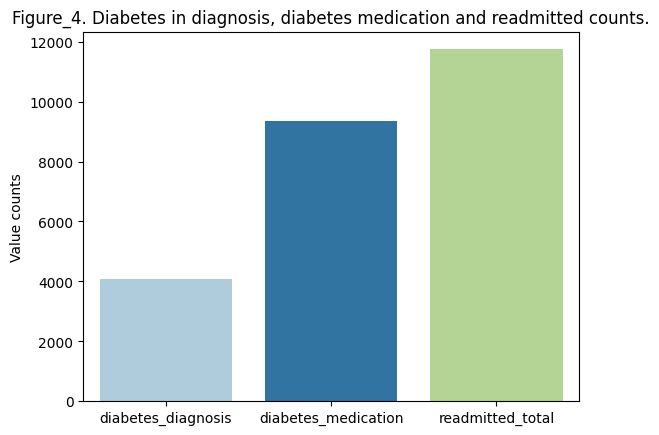

In [13]:
sns.barplot(x = ['diabetes_diagnosis', 'diabetes_medication', 'readmitted_total'], y = [diabetes_readmitted_total, diabetes_medication_total, readmitted_total], palette= custom_palette).set(title = 'Figure_4. Diabetes in diagnosis, diabetes medication and readmitted counts.')
plt.ylabel('Value counts')
plt.show()

As it is shown in Figure_4, the number of patients, who were prescribed the diabetes medication is much higher than the number of patients with diabetes diagnosis (either primary, secondary or additional secondary diagnosis). 
In 79.59% cases the patients, who were prescribed diabetes medication, were readmitted.

In [14]:
diabetes_to_readmitted = diabetes_readmitted_total / readmitted_total * 100
print("Diabetes diagnosis, percentage to total readmitted:" + " " + str(diabetes_to_readmitted))

diabetes_medication_to_readmitted = diabetes_medication_total / readmitted_total * 100
print("Diabetes medication prescribed, percentage to total readmitted:" + " " + str(diabetes_medication_to_readmitted))

Diabetes diagnosis, percentage to total readmitted: 34.78815722307299
Diabetes medication prescribed, percentage to total readmitted: 79.69201973796154


We have further investigated whether glucose blood level (glucose_test), the amount of glycated hemoglobin (A1Ctest) or a change in medication (change) affected the rate of readmissions. We plotted the data as seaborn barplot(), using hue for readmission.

  readmitted glucose_test  count
3        yes           no  11064
4        yes         high    357
5        yes       normal    333


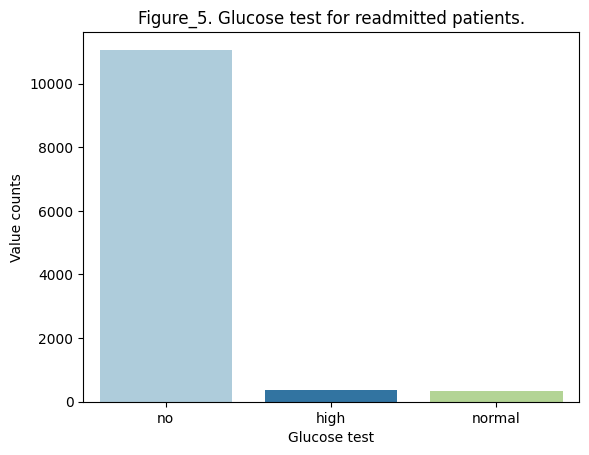

In [15]:
glucose_high = df.groupby("readmitted", as_index=False)["glucose_test"].value_counts()

glucose_high_readmitted_yes = glucose_high[glucose_high['readmitted'] == 'yes']
print(glucose_high_readmitted_yes)

sns.barplot(x='glucose_test', y='count', palette= custom_palette, data=glucose_high_readmitted_yes).set(title = 'Figure_5. Glucose test for readmitted patients.')
plt.xlabel('Glucose test')
plt.ylabel('Value counts')
plt.show()


As it is shown in Figure_5, in most cases there was no glucose test performed. Thus, there is no obvious dependency between high blood glucose level and readmission.

  readmitted A1Ctest  count
4        yes    high   1299
5        yes  normal    520


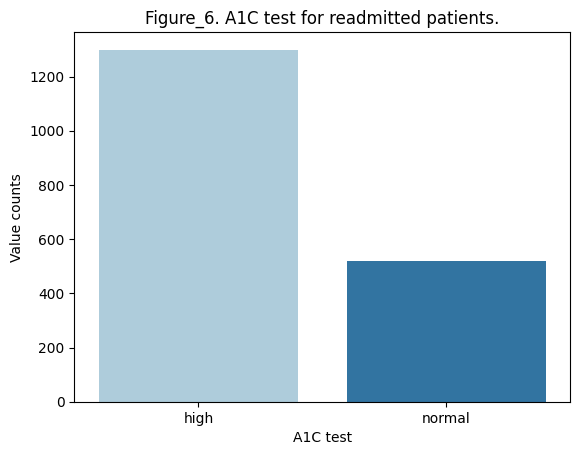

In [16]:
A1G_test = df.groupby("readmitted", as_index=False)["A1Ctest"].value_counts()

A1G_test_readmitted_yes = A1G_test[(A1G_test['readmitted'] == 'yes') & (A1G_test['A1Ctest'] == 'high') | (A1G_test['readmitted'] == 'yes') & (A1G_test['A1Ctest'] == 'normal')]
print(A1G_test_readmitted_yes)

sns.barplot(x='A1Ctest', y='count',  palette= custom_palette, data=A1G_test_readmitted_yes).set(title = 'Figure_6. A1C test for readmitted patients.')
plt.xlabel('A1C test')
plt.ylabel('Value counts')
plt.show()

However, as it shown in Figure_6, for the group of readmitted patients, whose blood was tested for glycated hemoglobin (A1Ctest), the number of patients with high glycated hemoglobin A1C level was more than twice higher than the number of patients with normal glycated hemoglobin A1C level. 

  readmitted change  count  percentage_to_total
2        yes     no   6077            51.701548
3        yes    yes   5677            48.298452


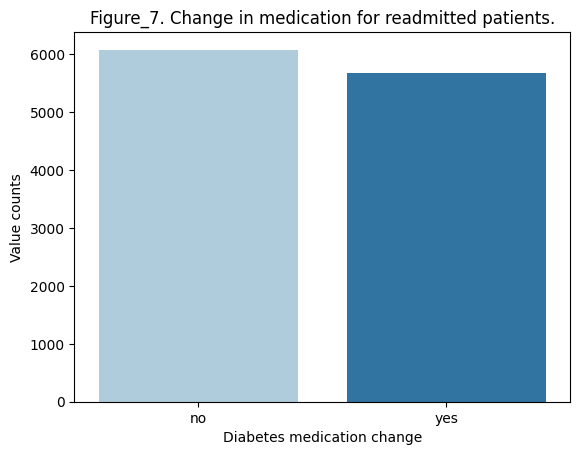

In [17]:
medication_change = df.groupby("readmitted", as_index=False)["change"].value_counts()

medication_change_readmitted_yes = medication_change[medication_change['readmitted'] == 'yes']

medication_change_readmitted_yes_total = medication_change_readmitted_yes['count'].sum()

medication_change_readmitted_yes['percentage_to_total'] = medication_change_readmitted_yes['count'] / medication_change_readmitted_yes_total * 100
print(medication_change_readmitted_yes.head())

sns.barplot(x='change', y='count', palette = custom_palette,  data=medication_change_readmitted_yes).set(title = 'Figure_7. Change in medication for readmitted patients.')
plt.xlabel('Diabetes medication change')
plt.ylabel('Value counts')
plt.show()


In 48.3% cases the change in diabetes medication resulted in readmission (see Figure_7).

Thus, we can conclude that diabetes medication prescription was the major factor affecting a patient readmission. 

The third question of the challenge is:

	On what groups of patients should the hospital focus their follow-up efforts to better monitor patients with a high probability of readmission?

To answer the question, we have created a subset of df DataFrame, called age_diagnosis_readmission, where we have grouped both readmitted and non-readmitted patients by age groups, primary diagnosis and diabetes medication and counted the values. Using age_diagnosis_readmission subset, we selected a new subset, called age_diagnosis_readmission_yes, which included only the data for readmitted patients who were prescribed diabetes medication. Then, we use seaborn barplot to plot the value counts along x-axis and the age groups along y-axis, and hue to present primary diagnosis.

        age primary_diagnosis diabetes_medication readmitted  count
2   [40-50)       Circulatory                 yes        yes    186
7   [40-50)          Diabetes                 yes        yes    169
10  [40-50)         Digestive                 yes        yes     83
14  [40-50)            Injury                 yes        yes     44
18  [40-50)   Musculoskeletal                 yes        yes     33


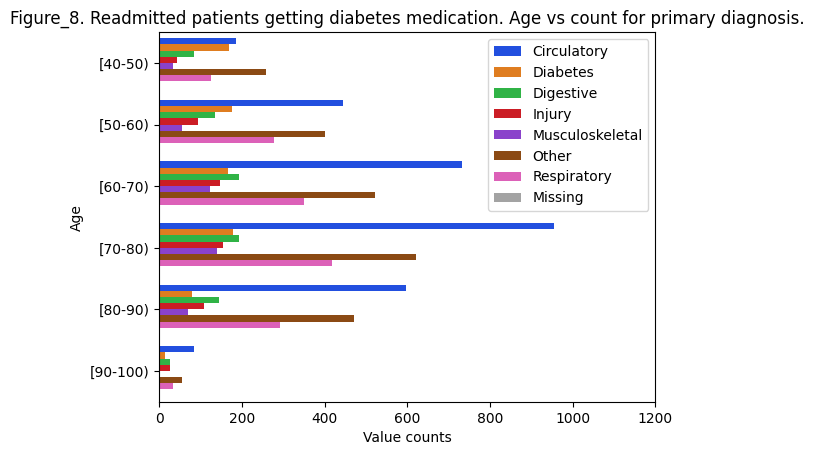

In [18]:
age_diagnosis_readmission = df.groupby(['age', 'diag_1', 'diabetes_med'], as_index=False)["readmitted"].value_counts(ascending = True)

age_diagnosis_readmission_yes = age_diagnosis_readmission[(age_diagnosis_readmission['readmitted']== 'yes') & (age_diagnosis_readmission['diabetes_med']== 'yes')]

age_diagnosis_readmission_yes.rename(columns={"diag_1":"primary_diagnosis", "diabetes_med":"diabetes_medication"}, inplace=True)
print(age_diagnosis_readmission_yes.head())

sns.barplot(x='count', y='age', hue='primary_diagnosis', palette= custom_palette_1, data=age_diagnosis_readmission_yes).set(title = 'Figure_8. Readmitted patients getting diabetes medication. Age vs count for primary diagnosis.')
plt.xlabel('Value counts')
plt.ylabel('Age')
plt.xlim(0, 1200)
plt.legend(loc='upper right')
plt.show()


As it is seen in Figure_8, the maximal number of readmitted patients demonstrated 70-80 age group, followed by 60-70 age group. 

Since, the number of readmitted patients within age groups was different, we normalized the data. We used seaborn barplot to present percentage_to_total_count along x-axis, age along y-axis and hue for primary_diagnosis.

        age primary_diagnosis  ... count percentage_to_total_count
2   [40-50)       Circulatory  ...   186                 20.735786
7   [40-50)          Diabetes  ...   169                 18.840580
10  [40-50)         Digestive  ...    83                  9.253066
14  [40-50)            Injury  ...    44                  4.905240
18  [40-50)   Musculoskeletal  ...    33                  3.678930

[5 rows x 6 columns]


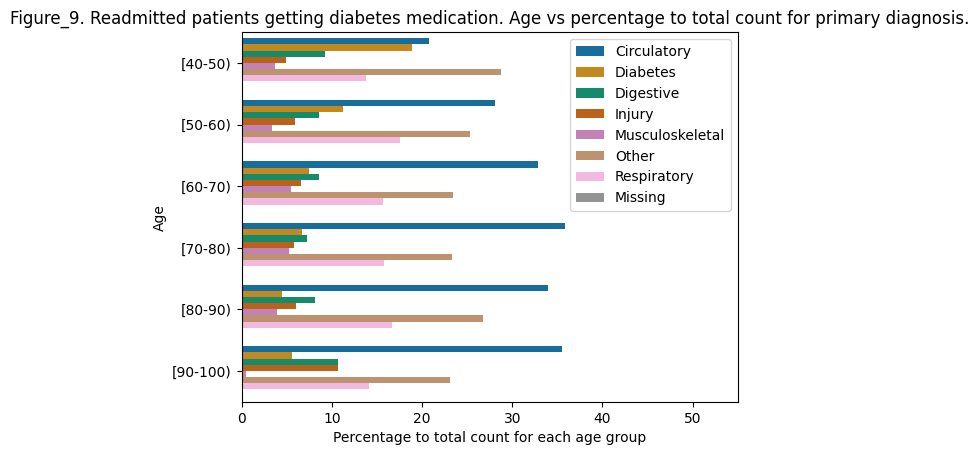

In [19]:
age_diagnosis_readmission_yes['percentage_to_total_count'] = age_diagnosis_readmission_yes.groupby('age', group_keys=False ).apply(lambda x: x['count'] / x['count'].sum() * 100).sort_index()
print(age_diagnosis_readmission_yes.head())

sns.barplot(x='percentage_to_total_count', y='age', hue='primary_diagnosis',  data=age_diagnosis_readmission_yes).set(title = 'Figure_9. Readmitted patients getting diabetes medication. Age vs percentage to total count for primary diagnosis.')
plt.xlabel('Percentage to total count for each age group')
plt.ylabel('Age')
plt.xlim(0, 55)
plt.legend(loc='upper right')
plt.show()


The data presented in Figure_9 demonstrate that the patients of 60-70 age group and older age groups, who have "Circulatory" as a primary diagnosis and are prescribed diabetes medication, are more likely to be readmitted in comparison with the patients, who are prescribed diabetes medication but have other than "Circulatory" primary diagnosis.

Conclusions.
1.	Circulatory primary diagnosis is the most common diagnosis for patients of all age groups except 40-50 age group. For people in the 40-50 age group the diagnosis, named as Other, is the dominant one.
2.	Diabetes in a patient diagnosis (either primary, secondary or additional secondary diagnosis) affected the patient readmission in a less degree than prescribed diabetes medication. In 79.59% cases, the patients, who were prescribed diabetes medication, were readmitted. There is no enough information to make a conclusion that high glucose level was the reason for a readmission since in the most cases a glucose test was not performed. However, when the glucose test was done, a high level of advanced glycated hemoglobin (A1C test) was observed in more than 2/3 of readmitted patients. Additional factor that could affect readmission was a diabetes medication change.
3.	The maximal number of readmitted patients was found in 70-80 age group, followed by 60-70 age group. Since, the number of readmitted patients within age groups was different, we used the normalized data for each age group. The data suggest that the patients of 60-70 age group and older, who have "Circulatory" as a primary diagnosis and are prescribed diabetes medication, are more likely to be readmitted in comparison with the patients, who are prescribed diabetes medication but have other than "Circulatory" primary diagnosis.
